In [ ]:
%pip install setuptools

In [1]:
import sys
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

2.18.0


In [2]:
train_dir = "./animals/train"
val_dir = "./animals/val"
test_dir = "./animals/test"

batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2900 files belonging to 4 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 376 files belonging to 4 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 117 files belonging to 4 classes.


In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
num_classes = 4

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
%pip install pydot

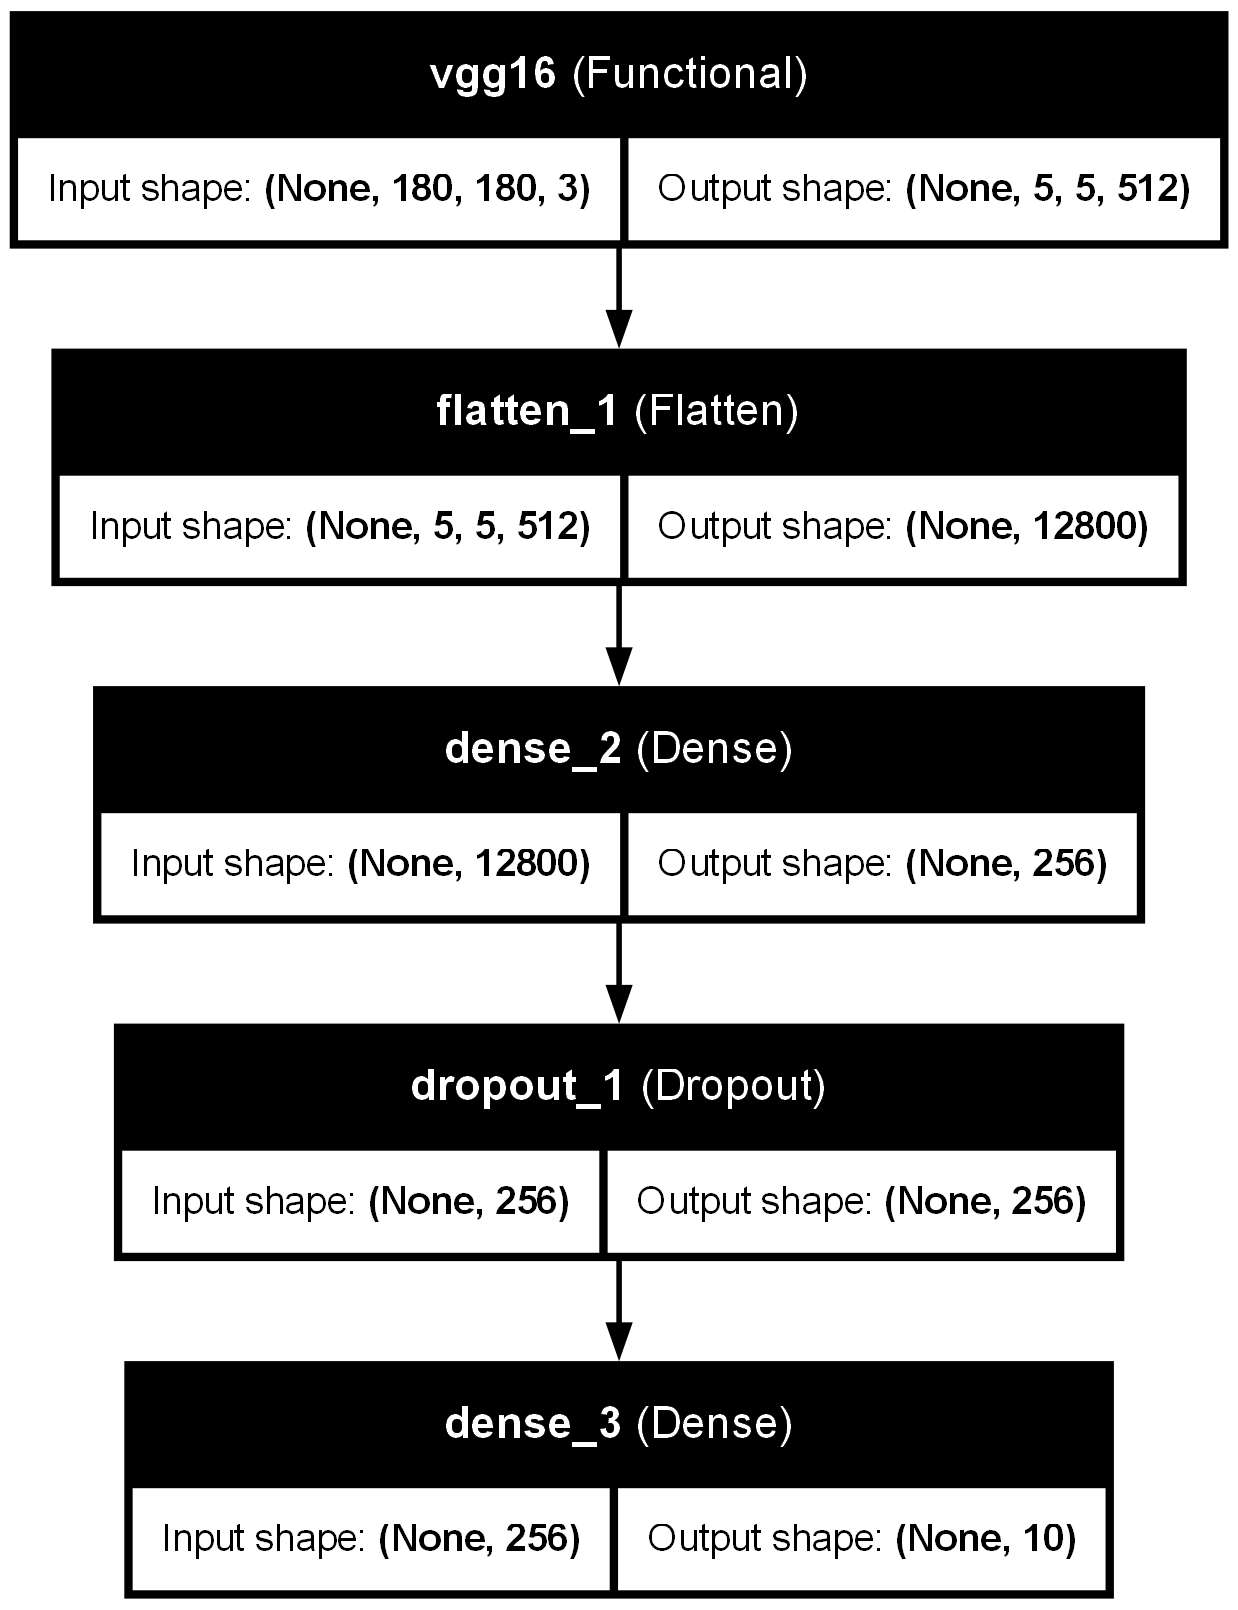

In [14]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


c:\Users\luisg\Documents\AI\animal-Recognition\server\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


91/91 ━━━━━━━━━━━━━━━━━━━━ 839s 9s/step - accuracy: 0.8271 - loss: 7.0347 - val_accuracy: 0.9521 - val_loss: 2.8733
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 756s 8s/step - accuracy: 0.9673 - loss: 0.7937 - val_accuracy: 0.9441 - val_loss: 2.9860
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 713s 8s/step - accuracy: 0.9719 - loss: 0.4473 - val_accuracy: 0.9441 - val_loss: 1.9408
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 724s 8s/step - accuracy: 0.9760 - loss: 0.3434 - val_accuracy: 0.9282 - val_loss: 3.6715
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 715s 8s/step - accuracy: 0.9655 - loss: 0.5670 - val_accuracy: 0.9681 - val_loss: 1.1929
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 714s 8s/step - accuracy: 0.9756 - loss: 0.2830 - val_accuracy: 0.9415 - val_loss: 2.7569
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 700s 8s/step - accuracy: 0.9725 - loss: 0.3533 - val_accuracy: 0.9202 - val_loss: 3.5618
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 707s 8s/step - accuracy: 0.9748 - loss: 0.3337 - val_accuracy: 0.9521 - val_loss: 2.

In [ ]:
%pip install matplotlib

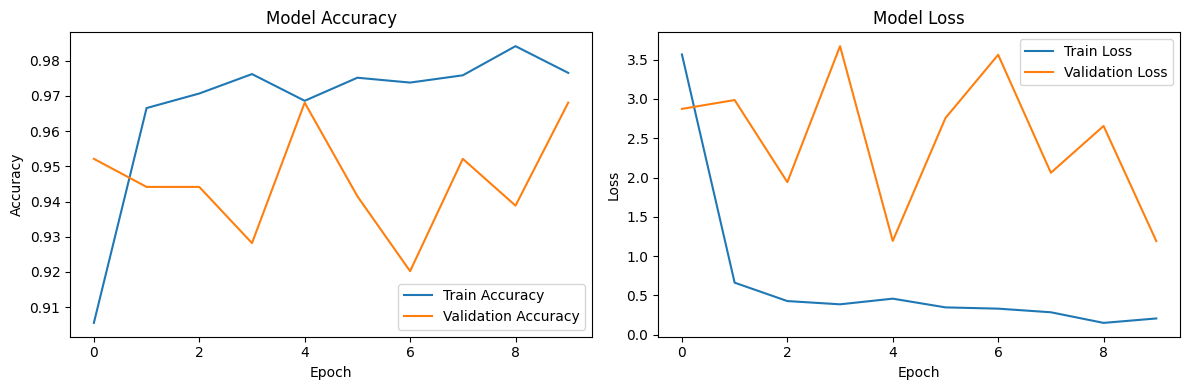

In [52]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [53]:
val_loss, val_acc = model.evaluate(test_ds)
print(f'Validation accuracy: {val_acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.9176 - loss: 1.3320
Validation accuracy: 0.9059829115867615


In [55]:
model.save('animal_classifier_modelv3.h5')